# Random Forest Training
David Frazier Algomorithmic Trading Homework


---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [5]:
# Set path to CSV and read in CSV
csv_path = Path('c:/FinTech/trading_signals_2.csv')
trading_signals_df=pd.read_csv(csv_path)
trading_signals_df.head()

,Timestamp,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
0,2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,10300.000000,10300.000000,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [6]:
# Set index as datetime object and drop extraneous columns
trading_signals_df.set_index(pd.to_datetime(trading_signals_df['Timestamp'], infer_datetime_format=True), inplace=True)
trading_signals_df.drop(columns=['Timestamp'], inplace=True)
trading_signals_df

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,10300.000000,10300.000000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 22:00:00+00:00,10274.6,10345.1,10274.6,10303.0,176.130751,BTC/USD,0.002764,10290.669841,10289.759171,1.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 23:00:00+00:00,10303.0,10400.0,10302.9,10364.6,210.168525,BTC/USD,0.005979,10327.925984,10302.796382,1.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-27 00:00:00+00:00,10364.4,10387.9,10312.3,10340.6,131.652337,BTC/USD,-0.002316,10334.287843,10308.743969,1.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-27 01:00:00+00:00,10340.6,10354.5,10292.2,10308.1,52.733723,BTC/USD,-0.003143,10321.168297,10308.651051,1.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Set X-Variable List and Filter to Obtain Associated Values

In [7]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Timestamp,,,
2019-09-25 12:00:00+00:00,-1.0,1.0,0.0
2019-09-25 13:00:00+00:00,-1.0,1.0,0.0
2019-09-25 14:00:00+00:00,-1.0,1.0,0.0
2019-09-25 15:00:00+00:00,-1.0,1.0,1.0
2019-09-25 16:00:00+00:00,-1.0,1.0,1.0


### Shift the DataFrame Index by 1

In [8]:
# Shift DataFrame values by 1
trading_signals_df[x_var_list] = trading_signals_df[x_var_list].shift(1)
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Timestamp,,,
2019-09-25 12:00:00+00:00,-1.0,1.0,0.0
2019-09-25 13:00:00+00:00,-1.0,1.0,0.0
2019-09-25 14:00:00+00:00,-1.0,1.0,0.0
2019-09-25 15:00:00+00:00,-1.0,1.0,0.0
2019-09-25 16:00:00+00:00,-1.0,1.0,1.0


### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [9]:
# Drop NAs and replace positive/negative infinity values
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.dropna(subset=['daily_return'], inplace=True)
trading_signals_df = trading_signals_df.replace([np.inf, -np.inf], np.nan)
trading_signals_df.head()

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,...,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 22:00:00+00:00,10274.6,10345.1,10274.6,10303.0,176.130751,BTC/USD,0.002764,10290.669841,10289.759171,1.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


## Plot of the Daily Returns

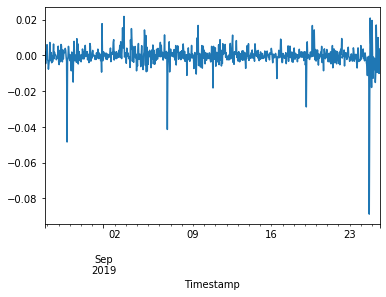

In [22]:
trading_signals_df["daily_return"].plot()

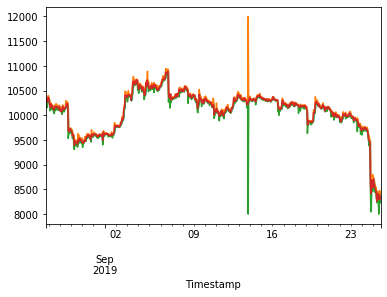

In [39]:
trading_signals_df["Open"].plot()
trading_signals_df["High"].plot()
trading_signals_df["Low"].plot()
trading_signals_df["Close"].plot()

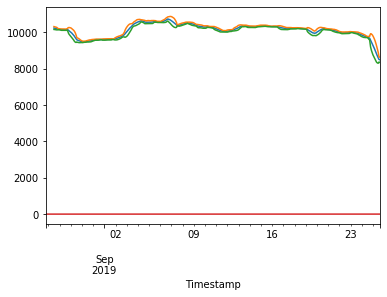

In [47]:
trading_signals_df["bollinger_mid_band"].plot()
#trading_signals_df["bollinger_std"].plot()
trading_signals_df["bollinger_upper_band"].plot()
trading_signals_df["bollinger_lower_band"].plot()
#trading_signals_df["bollinger_long"].plot()
#trading_signals_df["bollinger_short"].plot()
#trading_signals_df["bollinger_signal"].plot()


### Construct the Dependent Variable

In [48]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(trading_signals_df['daily_return'] > 0, 1.0, 0.0)
trading_signals_df

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,...,-1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2019-08-26 22:00:00+00:00,10274.6,10345.1,10274.6,10303.0,176.130751,BTC/USD,0.002764,10290.669841,10289.759171,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2019-08-26 23:00:00+00:00,10303.0,10400.0,10302.9,10364.6,210.168525,BTC/USD,0.005979,10327.925984,10302.796382,1.0,...,0.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2019-08-27 00:00:00+00:00,10364.4,10387.9,10312.3,10340.6,131.652337,BTC/USD,-0.002316,10334.287843,10308.743969,1.0,...,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-08-27 01:00:00+00:00,10340.6,10354.5,10292.2,10308.1,52.733723,BTC/USD,-0.003143,10321.168297,10308.651051,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2019-08-27 02:00:00+00:00,10308.1,10317.9,10199.9,10228.7,263.670969,BTC/USD,-0.007703,10274.888954,10297.942885,0.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


### Assign Training and Testing Windows

In [49]:
# Construct training start and end dates
training_start = trading_signals_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-09-14'

# Construct testing start and end dates
testing_start =  '2019-09-15'
testing_end = trading_signals_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-08-26
Training End: 2019-09-14
Testing Start: 2019-09-15
Testing End: 2019-09-25


### Separate X and y Training Datasets

In [50]:
# Construct the X_train and y_train datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]
y_train = trading_signals_df['Positive Return'][training_start:training_end]

X_train.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Timestamp,,,
2019-09-14 19:00:00+00:00,1.0,1.0,-1.0
2019-09-14 20:00:00+00:00,1.0,1.0,-1.0
2019-09-14 21:00:00+00:00,1.0,1.0,-1.0
2019-09-14 22:00:00+00:00,1.0,1.0,-1.0
2019-09-14 23:00:00+00:00,1.0,1.0,0.0


In [51]:
y_train.tail()

Timestamp
2019-09-14 19:00:00+00:00    0.0
2019-09-14 20:00:00+00:00    1.0
2019-09-14 21:00:00+00:00    0.0
2019-09-14 22:00:00+00:00    0.0
2019-09-14 23:00:00+00:00    1.0
Name: Positive Return, dtype: float64

### Separate X and y Testing Datasets

In [52]:
# Construct the X test and y test datasets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]

X_test.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Timestamp,,,
2019-09-25 12:00:00+00:00,-1.0,1.0,0.0
2019-09-25 13:00:00+00:00,-1.0,1.0,0.0
2019-09-25 14:00:00+00:00,-1.0,1.0,0.0
2019-09-25 15:00:00+00:00,-1.0,1.0,0.0
2019-09-25 16:00:00+00:00,-1.0,1.0,1.0


In [53]:
y_test.tail()

Timestamp
2019-09-25 12:00:00+00:00    0.0
2019-09-25 13:00:00+00:00    1.0
2019-09-25 14:00:00+00:00    0.0
2019-09-25 15:00:00+00:00    0.0
2019-09-25 16:00:00+00:00    1.0
Name: Positive Return, dtype: float64

### Import SKLearn Library and Classes

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Train Random Forest Model 

In [55]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
Timestamp,,
2019-09-15 00:00:00+00:00,0.0,0.0
2019-09-15 01:00:00+00:00,1.0,0.0
2019-09-15 02:00:00+00:00,0.0,0.0
2019-09-15 03:00:00+00:00,0.0,0.0
2019-09-15 04:00:00+00:00,1.0,1.0
2019-09-15 05:00:00+00:00,1.0,1.0
2019-09-15 06:00:00+00:00,0.0,1.0
2019-09-15 07:00:00+00:00,0.0,1.0
2019-09-15 08:00:00+00:00,0.0,1.0


In [56]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculate the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [21]:
# Calculating the accuracy score

acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68,84
Actual 1,44,61


Accuracy Score : 0.5019455252918288
Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.45      0.52       152
         1.0       0.42      0.58      0.49       105

    accuracy                           0.50       257
   macro avg       0.51      0.51      0.50       257
weighted avg       0.53      0.50      0.50       257



### Save Pre-Trained Model Using Joblib

In [15]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']